# FINAL PROJECT 4 : CLUSTERING CREDIT CARD COSTUMER 
Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science

## Introduction

### Our Members:
1. Ahmad Firdaus Zulva
2. Notasonda Soni Putra
3. Windy Mega Melani

### Abstract

<p style='text-align: justify;'>
    Keberadaan kartu kredit sudah dikenal sejak lama, namun model transaksi keuangan saat ini membuat kartu kredit menjadi jauh lebih berguna dan nyaman. Tapi apa sebenarnya kartu kredit itu? Secara sederhana,  kartu kredit diartikan sebagai alat pembayaran berupa kartu yang biaya pembayarannya dalam suatu transaksi keuangan ditanggung terlebih dahulu oleh  penerbit kartu. Setelah itu, pemegang kartu kredit wajib melunasi hutang pembayaran kartu tepat waktu yang telah disepakati sebelumnya. Kartu kredit berbeda dari kartu debit uang asli nasabah, sehingga kartu kredit dapat menawarkan manfaat unik bagi orang yang menggunakannya. Namun, dalam banyak hal, kartu kredit tidak berbeda dengan kartu debit.Perbedaannya hanya pada modal yang digunakan. Dana kartu kredit adalah saldo terutang yang dibatasi hingga jumlah tertentu.</p>

<p style='text-align: justify;'>
Pemegang kartu kredit akan dikenakan biaya tertentu atas penggunaan kartu kredit tersebut. Biaya tahunan dibebankan kepada pengguna kartu kredit sesuai dengan fasilitas yang diberikan oleh  bank. Dalam banyak kasus, biaya tahunan  tahun pertama sering kali diabaikan untuk keuntungan tambahan bagi pengguna kartu kredit. Selain itu, ada  biaya keterlambatan dan bunga. Biaya keterlambatan pembayaran dikenakan jika pemegang kartu terlambat membayar tagihan. Selama periode ini, bunga akan dikenakan jika nasabah menggunakan kartu untuk pembayaran kredit atau cicilan. Jika nasabah melebihi batas kartu kreditnya, nasabah juga akan dikenakan biaya.</p>
    
<p style='text-align: justify;'>
Selain biaya tersebut, terdapat biaya tambahan untuk beberapa layanan yang ditawarkan oleh kartu kredit, seperti biaya penarikan tunai dan  informasi pembayaran. Biaya penarikan tunai biasanya dikenakan jika Anda menggunakan kartu kredit untuk menarik dana. Sedangkan biaya informasi pembayaran akan dikenakan apabila nasabah membutuhkan informasi pembayaran yang detail dan lengkap. Jika memungkinkan, pilihlah kartu kredit tanpa biaya bulanan agar lebih ringan.</p>


### Data

<p style='text-align: justify;'>
    Dataset yang digunakan yaitu <b>Credit Card Data</b> yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut, antara lain: </p>

1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user


### Objective
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from pylab import bone, pcolor, colorbar, plot, show
# K-Means Clusterinng
from sklearn.cluster import KMeans
# DBScan Clustering
from sklearn.cluster import DBSCAN
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
# Visualization Hierarchy diagram
import scipy.cluster.hierarchy as shc
#DBSCAN
from sklearn.cluster import DBSCAN

import pickle

import warnings
warnings.filterwarnings("ignore")

bold = '\033[1m'
normal = '\033[0m'

## Data Loading

### Import Dataset

In [2]:
#Membaca data
df = pd.read_csv("CC GENERAL.csv")
pd.set_option("display.max_columns", None)

In [3]:
#Menampilkan 5 data teratas pada data
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#Menampilkan 5 data terbawah pada data
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


### Number of Rows and Columns

In [5]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Dari data tersebut di dapatkan jumlah baris terdiri dari",len(df), "dan jumlah kolom berjumlah",len(df.columns))

Dari data tersebut di dapatkan jumlah baris terdiri dari 8950 dan jumlah kolom berjumlah 18


### Columns

In [6]:
# Melihat nama kolom pada data
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

### Type of Data

In [7]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Check Missing Values

In [8]:
#Mengecek missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Check Duplicated Data

In [9]:
#Mengecek data duplikat
df.duplicated().sum()

0

## Data Cleaning

### Handling Missing Values

In [10]:
#Menangani missing values dengan mean
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [11]:
#Mengecek missing value
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Data Exploration

### Describe Data

In [12]:
#Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Correlation Data

In [13]:
# Melihat korelasi dalam data
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


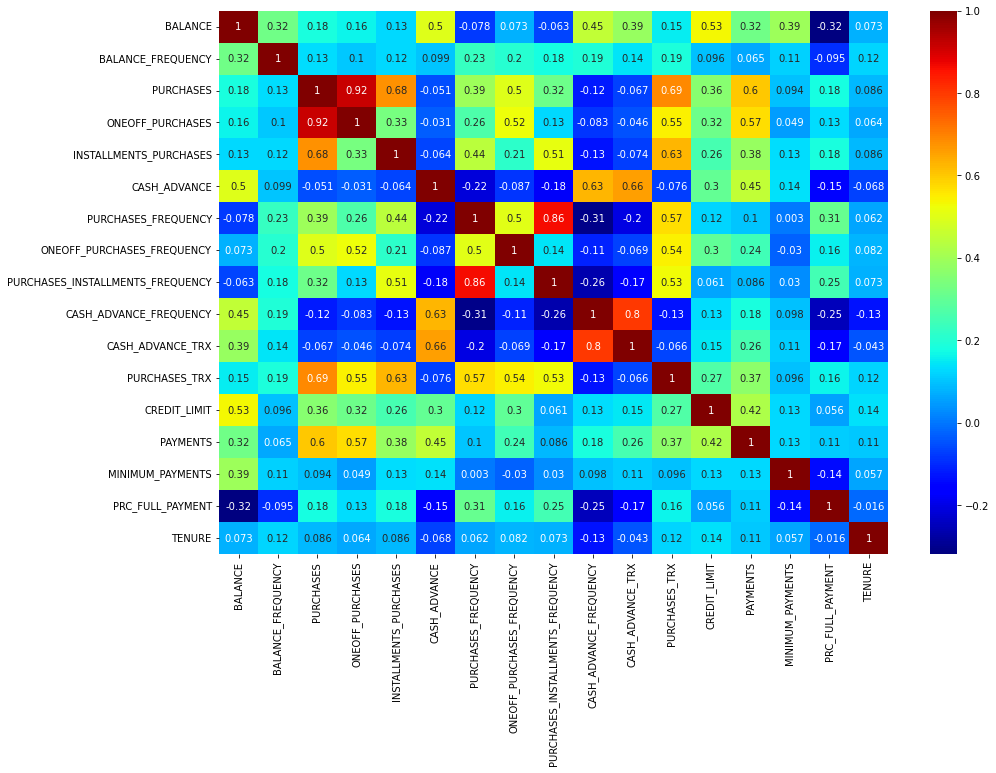

In [14]:
#Memvisualisasikan korelasi data dalam heatmap
df_corr=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(df_corr, annot=True,cmap='jet')

# Save Plot
plt.savefig("corr_chart.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### Histogram of Distribution Columns

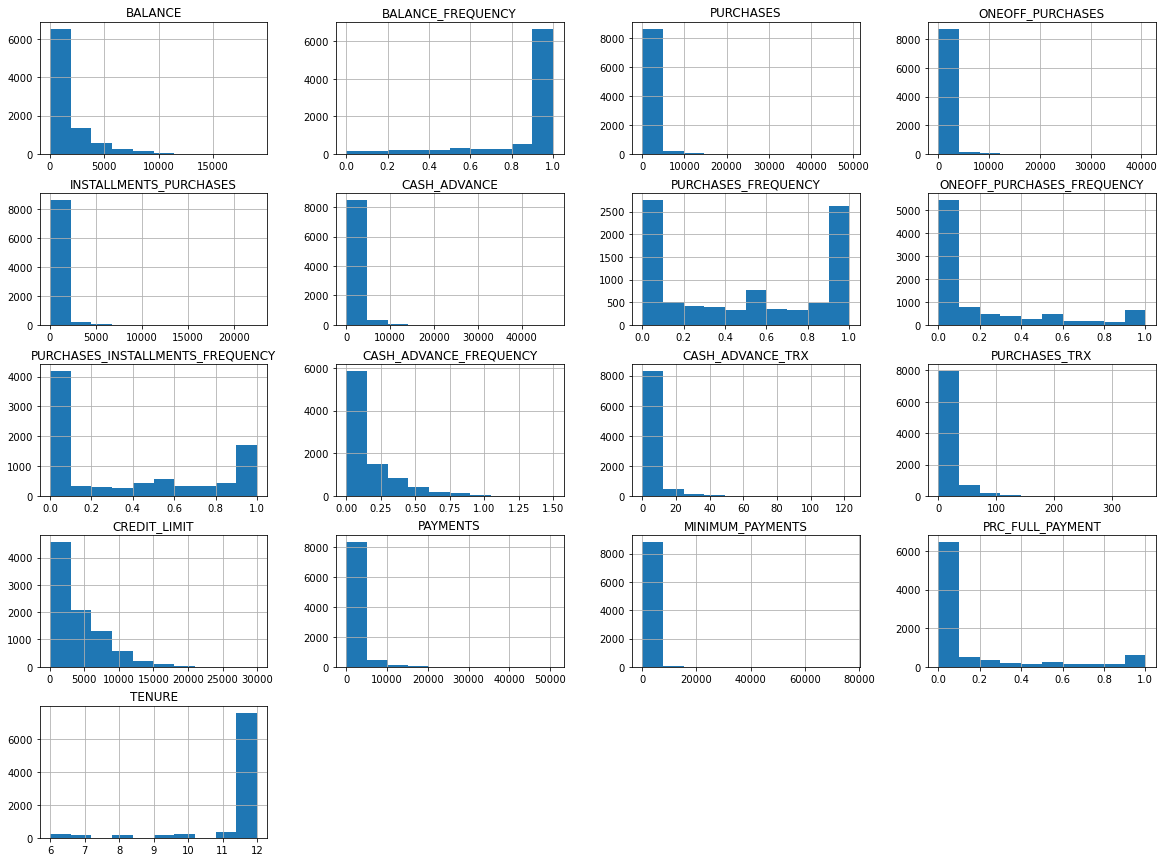

In [15]:
#Membuat histogram pada setiap kolom
df.hist(figsize=(20,15));

# Save Plot
plt.savefig("hist_dist.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

## Data Preprocessing

### Remove Useless Feature

In [16]:
#Menghapus kolom CUST_ID
df.drop(columns=["CUST_ID"], inplace=True)

#Melihat 5 data teratas
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
df_deploy = df.copy()
df_uji = df.copy()
df_copy = df.copy()
df_copy2= df.copy()

### Describe Data

In [18]:
#Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Scaling Data

In [19]:
a = [i for i in df.columns]

In [20]:
scaler = StandardScaler()
df[a] = scaler.fit_transform(df[a])
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


## Modeling

### KMEANS

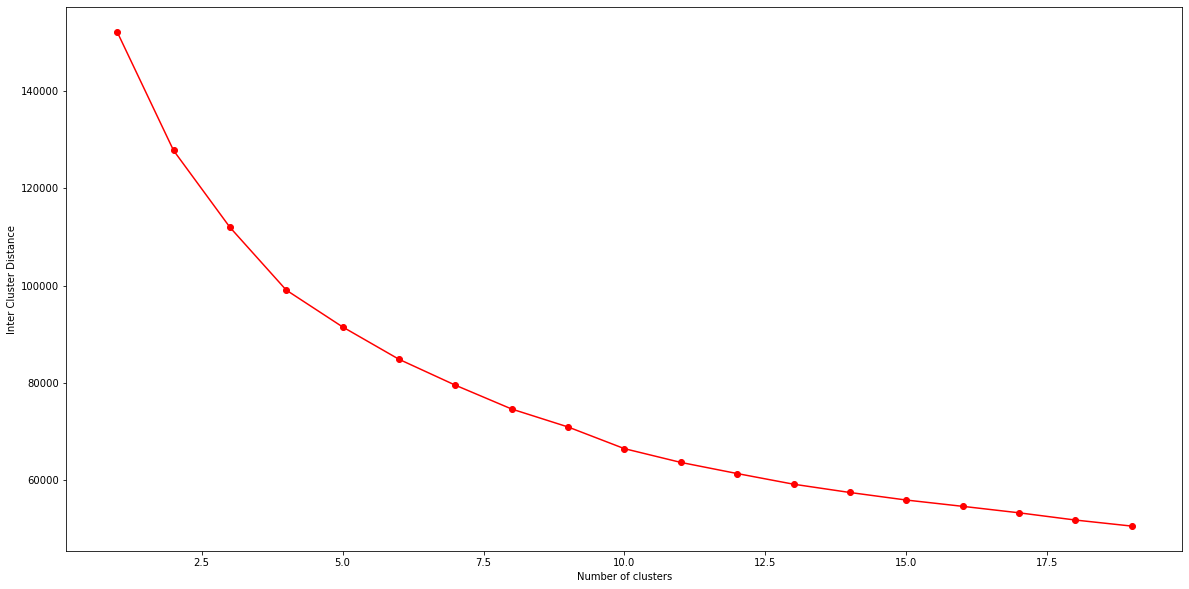

<Figure size 432x288 with 0 Axes>

In [21]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=40)
    km.fit(df)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(20,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

# Save Plot
plt.savefig("kmeans_graph_1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [22]:
km = KMeans(n_clusters = 6,init ='k-means++', max_iter=300,random_state=35)
model1=km.fit(df)
y_pred = km.predict(df)

In [23]:
clus_df = pd.DataFrame(df,columns = df.columns)
clus_df['CLUSTERS'] = y_pred
clus_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,3
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,2
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068,3
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,3
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740557,-0.115060,6.621186e-01,-0.525551,0.36068,1
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.983008,2.475134,1.596313,-2.858411e-01,2.893453,0.36068,0
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786,1.269843,-0.678661,1.599199,-0.675349,-0.476070,-0.109020,-0.603134,-0.364116,-1.425353e-01,-0.525551,0.36068,1
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786,-0.391225,-0.399319,-0.287947,-0.675349,-0.476070,-0.390639,0.688639,-0.360933,-2.369677e-01,-0.525551,0.36068,3
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,-0.476070,-0.471102,1.788021,-0.196336,-3.277915e-01,-0.525551,0.36068,4


In [24]:
clus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [25]:
clus_df['CLUSTERS'].value_counts()

3    3038
1    2230
0    1318
4    1312
2     971
5      81
Name: CLUSTERS, dtype: int64

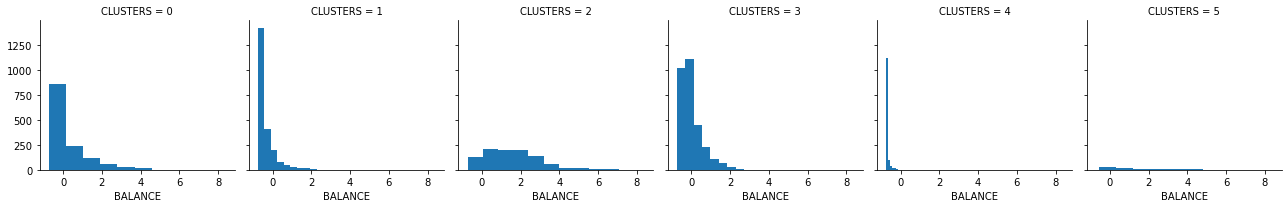

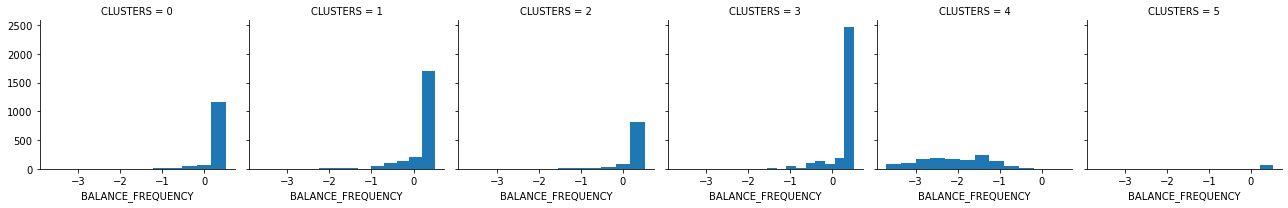

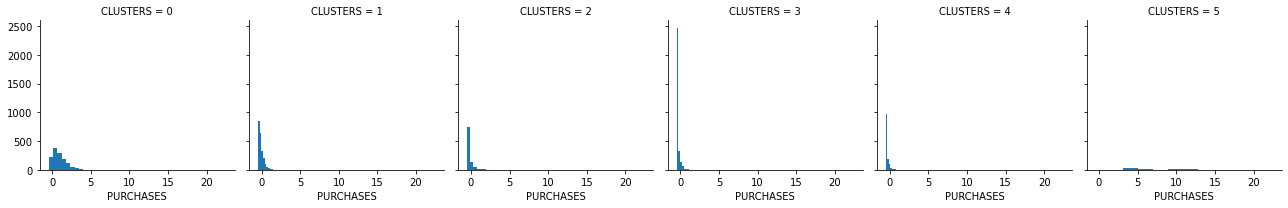

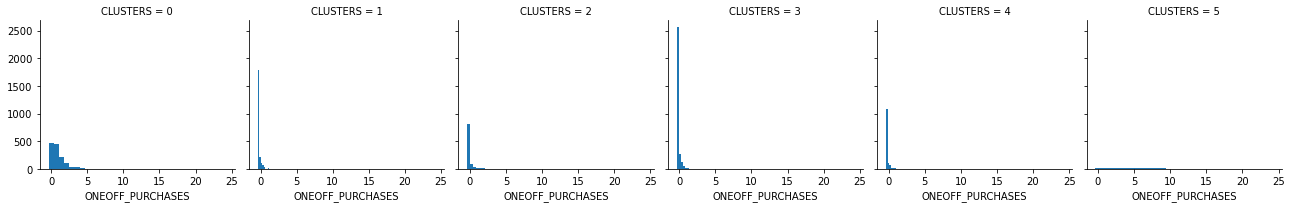

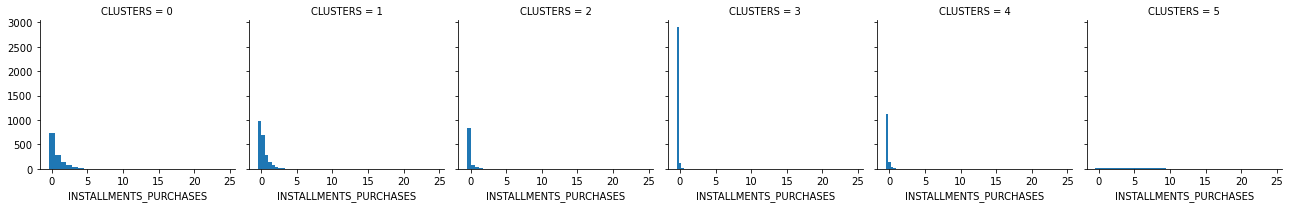

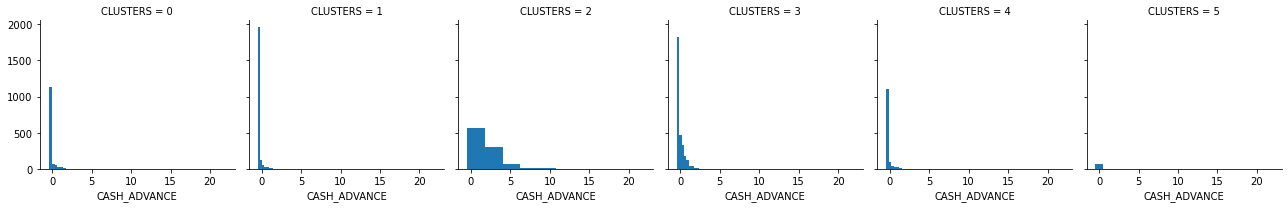

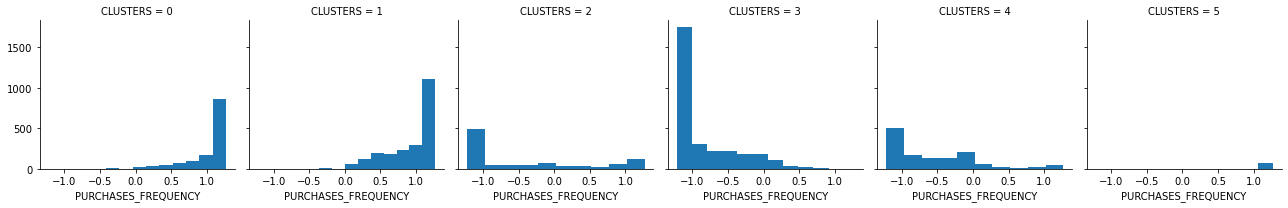

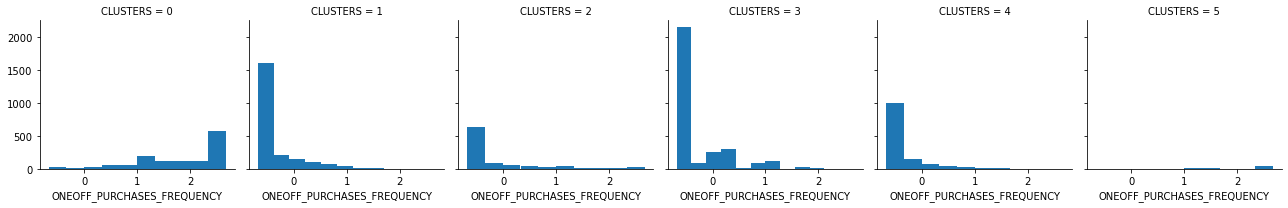

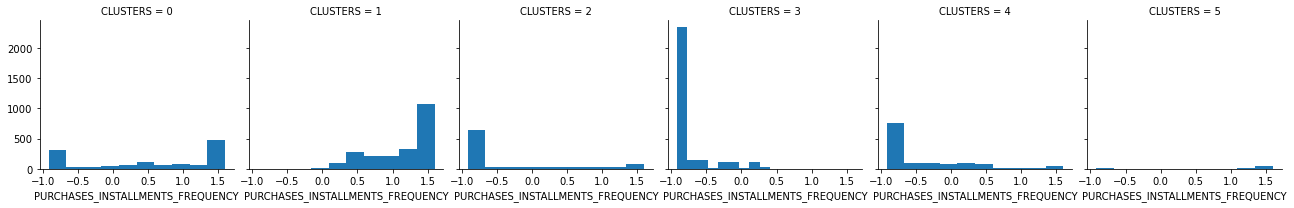

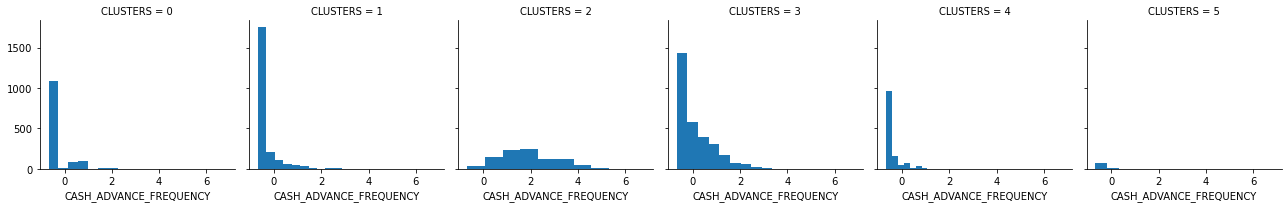

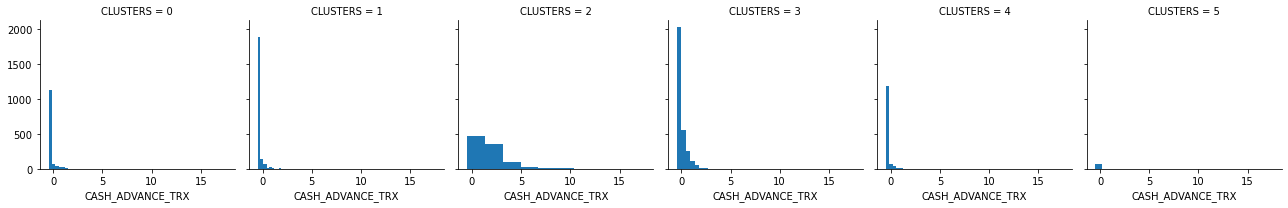

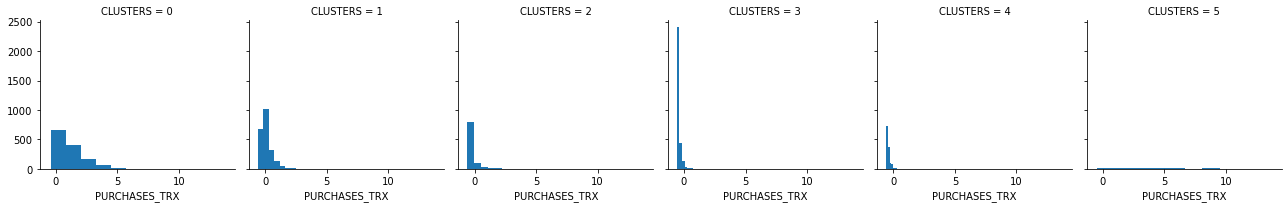

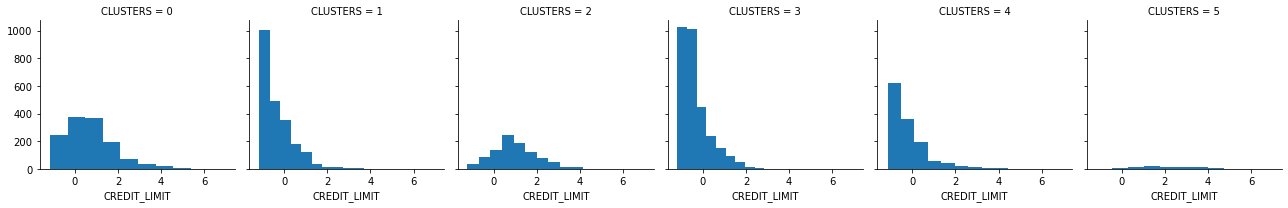

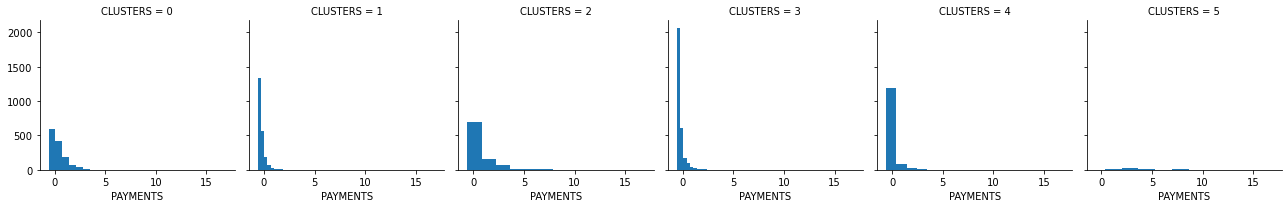

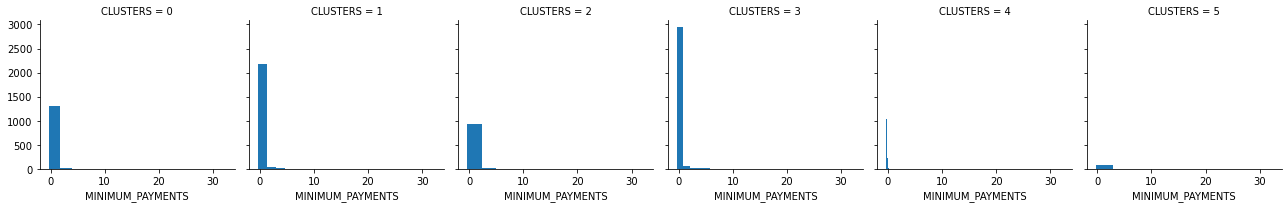

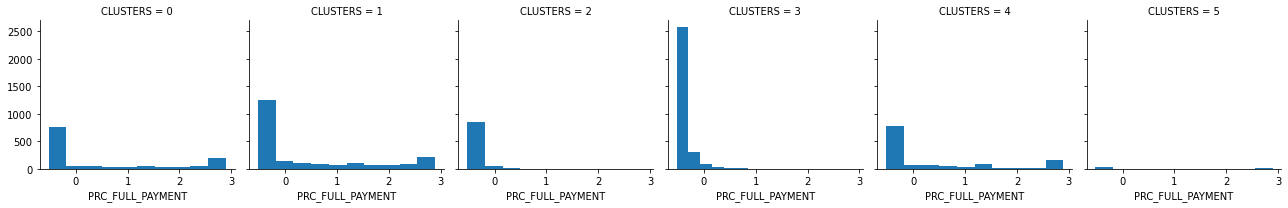

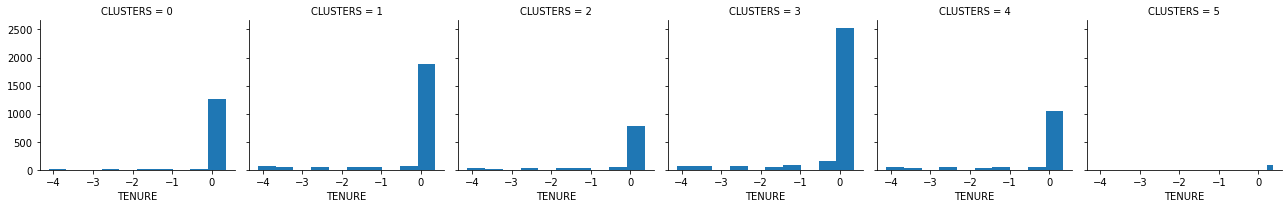

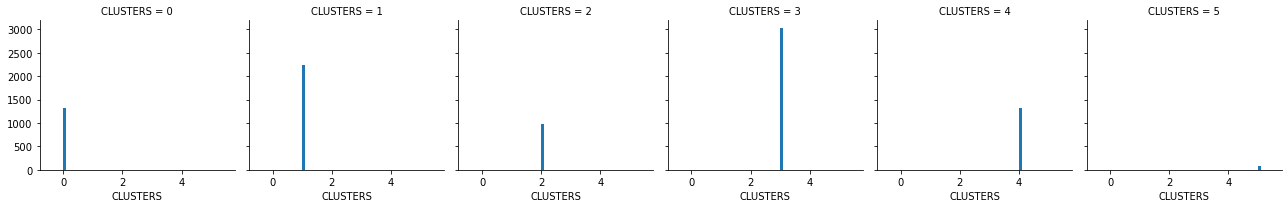

In [26]:
for c in clus_df:
    grid= sns.FacetGrid(clus_df, col='CLUSTERS')
    grid.map(plt.hist, c)

# Save Plot
plt.savefig("kmeans_clust.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**ANALISIS DIAGRAM**

<ul>
    <li><b>Cluster 0</b> = Ditunjukkan untuk Jumlah saldo yang dimiliki dalam akun cukup tinggi sehingga dapat mampu melakukan pembelian, dengan kriteria: 
        <ul>
            <li>frekuensi pembelian cukup tinggi,</li> 
            <li>kredit limit yang cukup besar,</li> 
            <li>suku bunga yang dibayarkan pengguna tinggi,</li>
            <li>dan memiliki tenor yang lama </li>
        </ul>
        <b>Dengan jumlah pengguna lebih rendah dari cluster 3 dan 1</b>
    </li>
    <li><b>Cluster 1</b> = Ditunjukkan untuk Jumlah saldo yang rendah dimiliki dalam akun dapat mampu melakukan pembelian, dengan kriteria: 
        <ul>
            <li>frekuensi pembelian tinggi,</li> 
            <li>kredit limit yang sedang,</li> 
            <li>suku bunga yang dibayarkan pengguna tidak terlalu tinggi,</li>
            <li>dan memiliki tenor lebih lama dari cluster 0</li>
        </ul>
        <b>Dengan jumlah pengguna lebih rendah dari cluster 3</b>
    </li>
    <li><b>Cluster 2</b> = Ditunjukkan untuk Jumlah saldo yang dimiliki dalam akun yang Tinggi untuk melakukan pembelian, dengan kriteria: 
        <ul>
            <li>frekuensi pembelian rata-rata,</li> 
            <li>kredit limit dengan kriteria cukup tinggi,</li> 
            <li>suku bunga yang dibayarkan pengguna rata-rata dengan seluruh kriteria,</li>
            <li>dan memiliki tenor lebih cepat dari cluster 1</li>
        </ul>
        <b>Dengan jumlah pengguna lebih tinggi dari cluster5</b>
    </li>
    <li><b>Cluster 3</b> = Ditunjukkan untuk Jumlah saldo yang dimiliki dalam akun yang cukup tinggi untuk melakukan pembelian sehingga memiliki kriteria, sebagai berikut: 
        <ul>
            <li>frekuensi pembelian dibawah rata-rata,</li> 
            <li>kredit limit dengan kriteria rata-rata,</li> 
            <li>suku bunga yang dibayarkan pengguna sedikit diatas rata-rata,</li>
            <li>dan memiliki tenor agak lebih lama dari cluster 2</li>
        </ul>
        <b>Dengan jumlah pengguna lebih tinggi dari seluruh cluster</b>
    </li>
    <li><b>Cluster 4</b> = Ditunjukkan untuk Jumlah saldo yang dimiliki dalam akun sangat rendah namun dapat mampu melakukan pembelian, dengan kriteria:  
        <ul>
            <li>frekuensi pembelian diatas rata-rata,</li> 
            <li>kredit limit dengan kriteria diaas rata-rata,</li> 
            <li>suku bunga yang dibayarkan pengguna diatas rata-rata 2 kali lipat dari cluster 2</li>
            <li>dan memiliki tenor lebih lama dari cluster 1, cluster 2, dan cluster 3</li>
        </ul>
        <b>Dengan jumlah pengguna lebih rendah dari cluster 0, cluster 1 dan cluster 3. Namun lebih tinggi dari cluster 2 dan cluster 5</b>
    </li>
    <li><b>Cluster 5</b> = Ditunjukkan untuk Jumlah saldo yang dimiliki dalam akun sangat tinggi sehingga dapat mampu melakukan pembelian, dengan kriteria:
        <ul>
            <li>frekuensi pembelian diatas dari seluruh cluster,</li> 
            <li>kredit limit yang besar</li> 
            <li>suku bunga yang dibayarkan pengguna dibawah dari seluruh cluster</li>
            <li>dan memiliki tenor lebih cepat dari seluruh cluster</li>
        </ul>
        <b>Dengan jumlah pengguna lebih rendah dari seluruh cluster</b>
    </li>
</ul>

In [27]:
X = clus_df[['BALANCE','PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'TENURE','PRC_FULL_PAYMENT']].to_numpy()

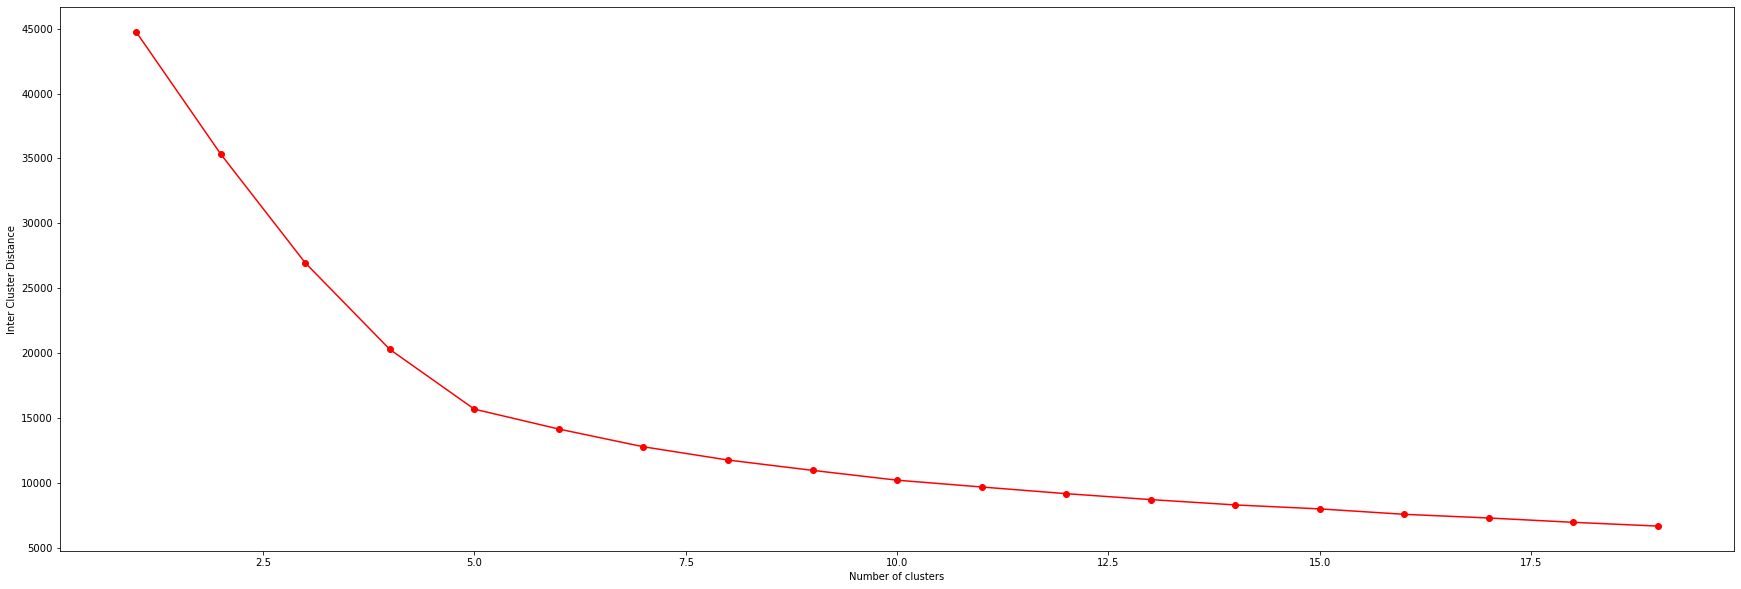

<Figure size 432x288 with 0 Axes>

In [28]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(X)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(30,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

# Save Plot
plt.savefig("kmeans_graph_2.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [29]:
km = KMeans(n_clusters = 6,init ='k-means++', max_iter=300,random_state=42)
model2=km.fit(X)
y_balance_pred = km.predict(X)

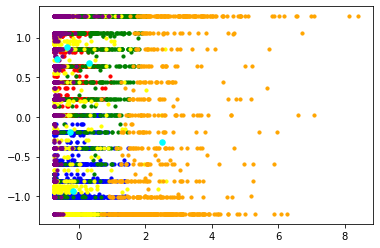

<Figure size 432x288 with 0 Axes>

In [30]:
plt.scatter(X[y_balance_pred==0, 0], X[y_balance_pred==0, 1], s=10, c='red', label ='Cluster 1')
plt.scatter(X[y_balance_pred==1, 0], X[y_balance_pred==1, 1], s=10, c='blue', label ='Cluster 2')
plt.scatter(X[y_balance_pred==2, 0], X[y_balance_pred==2, 1], s=10, c='green', label ='Cluster 3')
plt.scatter(X[y_balance_pred==3, 0], X[y_balance_pred==3, 1], s=10, c='yellow', label ='Cluster 4')
plt.scatter(X[y_balance_pred==4, 0], X[y_balance_pred==4, 1], s=10, c='purple', label ='Cluster 5')
plt.scatter(X[y_balance_pred==5, 0], X[y_balance_pred==5, 1], s=10, c='orange', label ='Cluster 6')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=30, c='cyan', label = 'Centroids')
plt.show()

# Save Plot
plt.savefig("kmeans_graph_3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### Hierarchical Clustering

In [31]:
data_scaled = normalize(df_copy)
data_scaled = pd.DataFrame(data_scaled, columns=df_copy.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


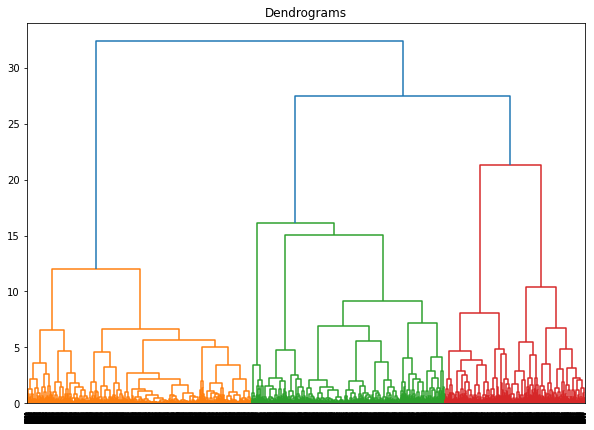

In [32]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

# Save Plot
plt.savefig("hier_graph_1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

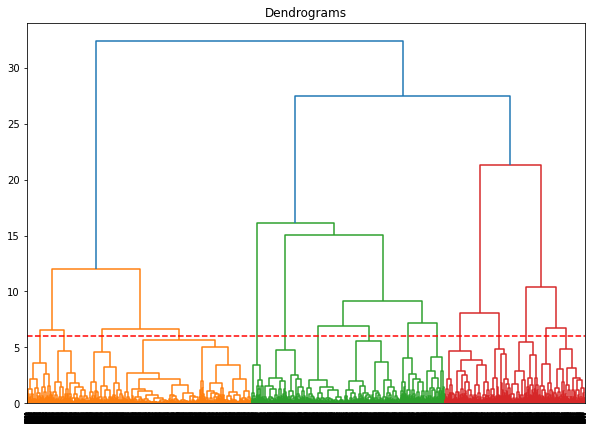

In [33]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'));
plt.axhline(y=6, color='r', linestyle='--');

# Save Plot
plt.savefig("hier_graph_2.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [34]:
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
model2 = hier.fit(data_scaled)
y_pred2 = hier.fit_predict(data_scaled)

In [35]:
hier_df = pd.DataFrame(df_copy,columns = df_copy.columns)
hier_df['CLUSTERS'] = y_pred2
hier_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,1


In [36]:
hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

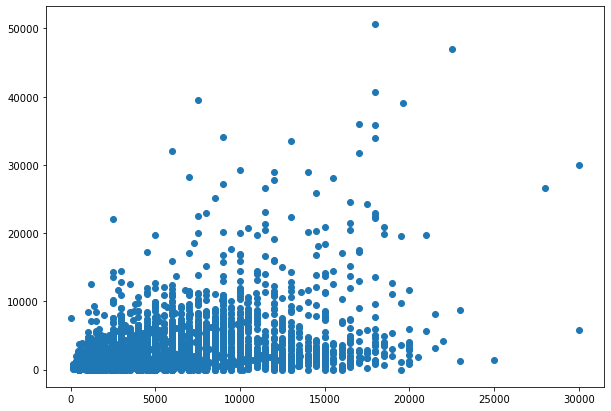

In [37]:
plt.figure(figsize=(10, 7))  
plt.scatter(hier_df['CREDIT_LIMIT'], hier_df['PAYMENTS'])

# Save Plot
plt.savefig("hier_graph_3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

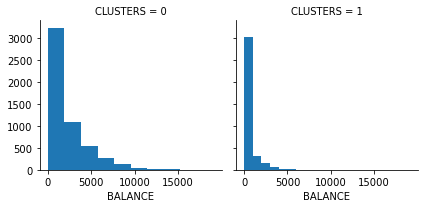

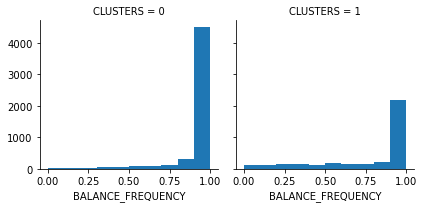

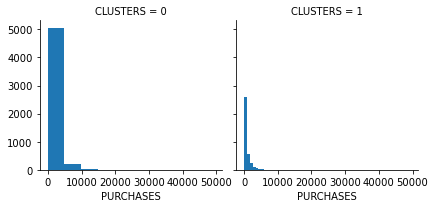

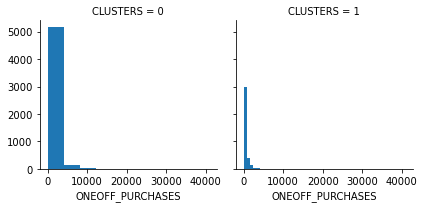

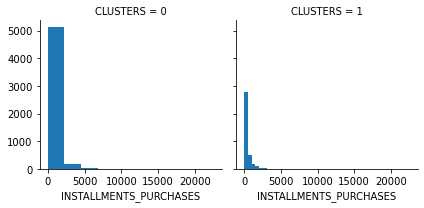

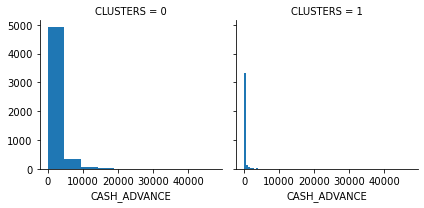

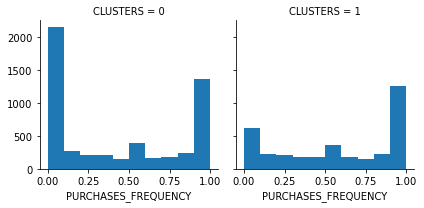

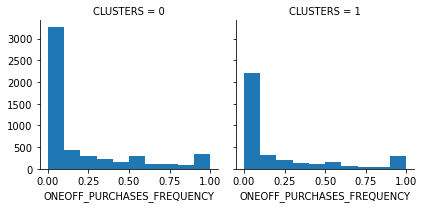

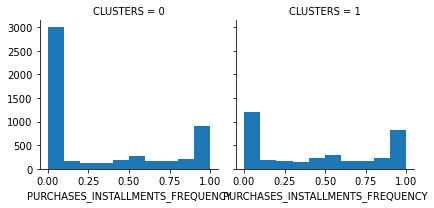

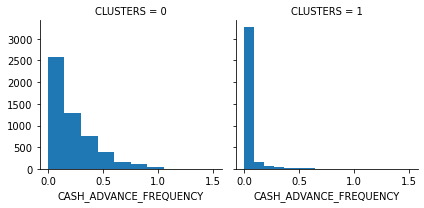

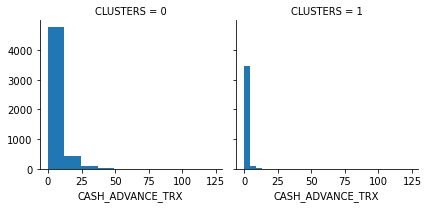

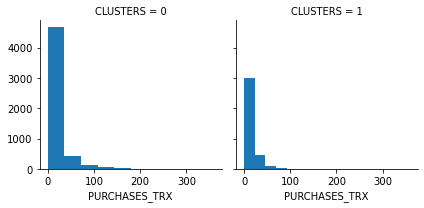

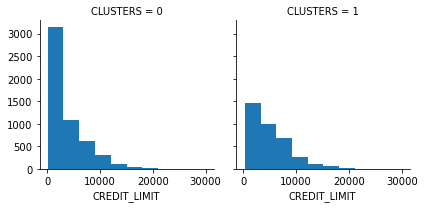

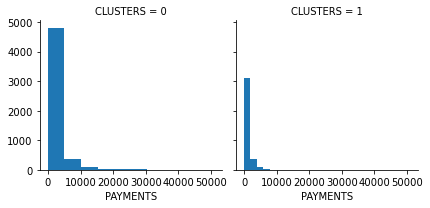

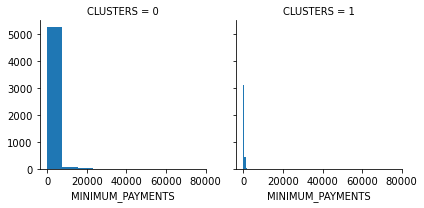

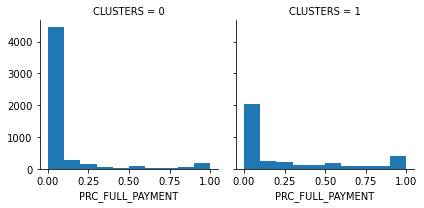

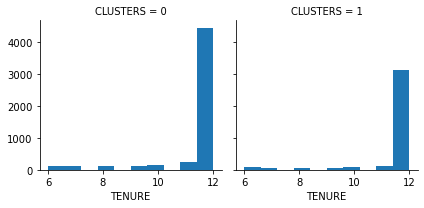

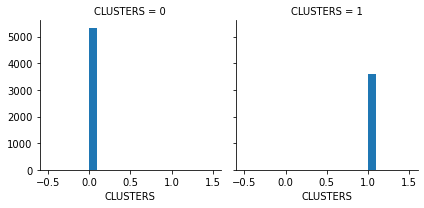

In [38]:
for c in hier_df:
    grid= sns.FacetGrid(hier_df, col='CLUSTERS')
    grid.map(plt.hist, c)
    
# Save Plot
plt.savefig("hier_clust.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**ANALISIS DIAGRAM**

<ul>
    <li><b>Cluster 0</b> = Memiliki jumlah pengguna <b>credit card</b> lebih banyak dari Cluster 1 dengan jumlah lebih dari 3000 pengguna (< 5000), dan dapat dilihat dari beberapa aspek berikut:
        <ul>
            <li>frekuensi pengguna yang telah membayar <i>credit card</i> lebih dari 4000 pengguna,</li> 
            <li>pengguna yang memiliki kredit limit dibawah 10000 (< 10000) lebih banyak dari cluster 1,</li> 
            <li>jumlah pengguna yang memiliki suku bunga dibawah 0.25 lebih banyak dibandingkan cluster 1,</li>
            <li>dan jumlah pengguna yang memliki tenor pembayaran lebih banyak dibandingkan cluster 1 </li>
        </ul>
    </li>
    <li><b>Cluster 1</b> = Memiliki jumlah pengguna <b>credit card</b> lebih banyak dari Cluster 1 dengan jumlah lebih dari 3000 pengguna (< 3000), dan dapat dilihat dari beberapa aspek berikut:
        <ul>
            <li>frekuensi pengguna yang telah membayar <i>credit card</i> lebih dari 3000 pengguna,</li> 
            <li>pengguna yang memiliki kredit limit dibawah 10000 (< 10000) lebih rendah dari cluster 0,</li> 
            <li>jumlah pengguna yang memiliki suku bunga di antara 0.50 - 1.00 lebih banyak dibandingkan cluster 0,</li>
            <li>dan jumlah pengguna yang memliki tenor pembayaran lebih sedikit dibandingkan cluster 0 </li>
        </ul>
    </li>
</ul>    

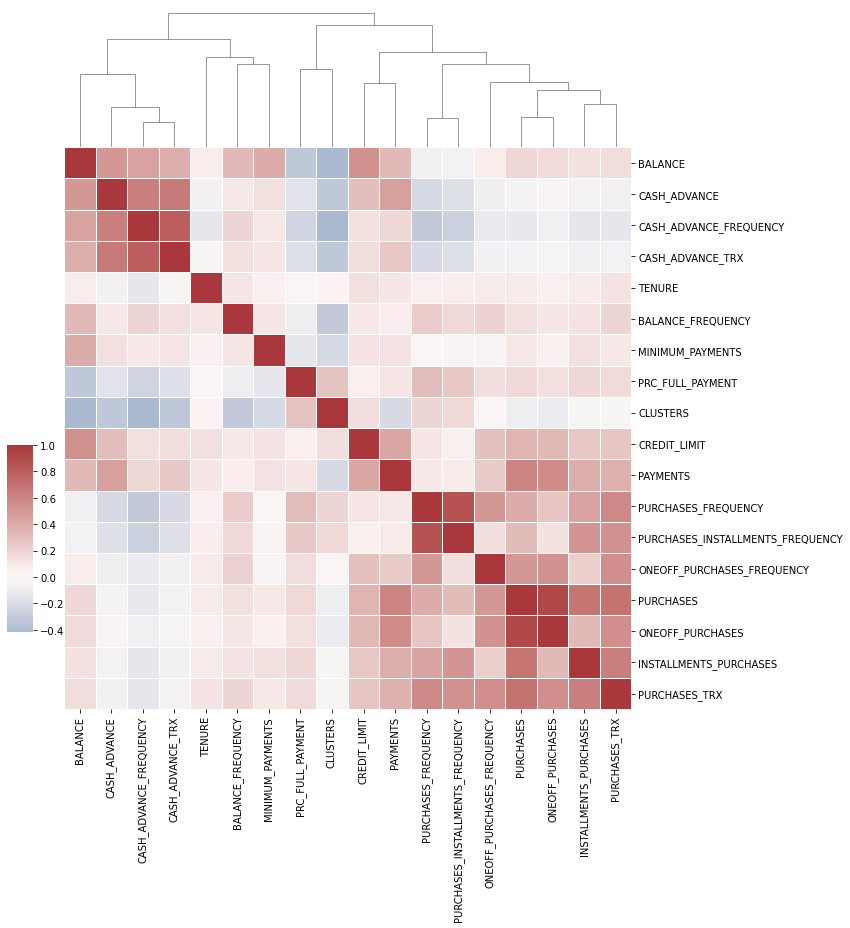

In [39]:
# Full Plot
g = sns.clustermap(hier_df.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

# Remove ax row
g.ax_row_dendrogram.remove()

# Save Plot
plt.savefig("hier_graph_4.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### DBSCAN

In [40]:
dbscan = DBSCAN(eps=2,min_samples=6)
df_dbscan= dbscan.fit(data_scaled)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
dbscan_df = pd.DataFrame(df_copy2,columns = df_copy2.columns)
dbscan_df['CLUSTERS'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


In [42]:
dbscan_df.tail(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
8940,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6,0
8941,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6,0
8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6,0
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0


In [43]:
dbscan_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,0.0
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.0
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.0
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,0.0
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,0.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,0.0


In [44]:
Y = dbscan_df[['BALANCE','PURCHASES']].to_numpy()

In [45]:
dbscan = DBSCAN(eps=0.075,min_samples=2)
dbscan.fit(Y)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([-1, -1, -1, ..., -1, 85, -1], dtype=int64)

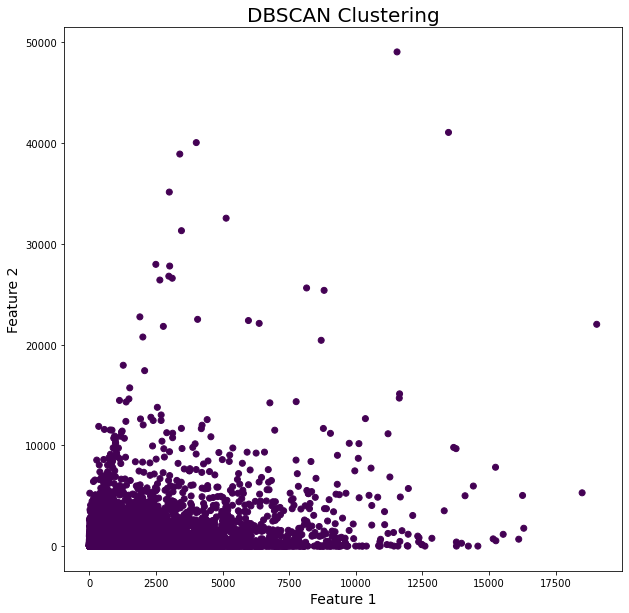

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(dbscan_df['BALANCE'],dbscan_df['PURCHASES'],c=dbscan_df['CLUSTERS'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# Save Plot
plt.savefig("dbscan_graph.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

## Model Inference

### Kmeans Clustering Data

In [47]:
df_deploy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

#### Kmeans numeric data

##### Tenure

In [48]:
df_cls_TENURE = pd.DataFrame(
    {
        "TENURE":df_deploy["TENURE"].unique(),
        "TENURE_num":df_deploy["TENURE"].unique()
    }
).sort_values(by="TENURE_num", ascending=True)

df_cls_TENURE = df_cls_TENURE.set_index(keys="TENURE_num",drop=True)
df_cls_TENURE

,TENURE
TENURE_num,
6,6
7,7
8,8
9,9
10,10
11,11
12,12


##### PRC Full Payment

In [49]:
df_cls_PRC_FULL_PAYMENT = pd.DataFrame(
    {
        "PRC_FULL_PAYMENT":df_deploy["PRC_FULL_PAYMENT"].unique(),
        "PRC_FULL_PAYMENT_num":df_deploy["PRC_FULL_PAYMENT"].unique()
    }
).sort_values(by="PRC_FULL_PAYMENT_num", ascending=True)

df_cls_PRC_FULL_PAYMENT = df_cls_PRC_FULL_PAYMENT.set_index(keys="PRC_FULL_PAYMENT_num",drop=True)
df_cls_PRC_FULL_PAYMENT

,PRC_FULL_PAYMENT
PRC_FULL_PAYMENT_num,
0.000000,0.000000
0.083333,0.083333
0.090909,0.090909
0.100000,0.100000
0.111111,0.111111
0.125000,0.125000
0.142857,0.142857
0.166667,0.166667
0.181818,0.181818


##### Minimum Payments

In [50]:
df_cls_MINIMUM_PAYMENTS = pd.DataFrame(
    {
        "MINIMUM_PAYMENTS":df_deploy["MINIMUM_PAYMENTS"].unique(),
        "MINIMUM_PAYMENTS_num":df_deploy["MINIMUM_PAYMENTS"].unique()
    }
).sort_values(by="MINIMUM_PAYMENTS_num", ascending=True)

df_cls_MINIMUM_PAYMENTS = df_cls_MINIMUM_PAYMENTS.set_index(keys="MINIMUM_PAYMENTS_num",drop=True)
df_cls_MINIMUM_PAYMENTS

,MINIMUM_PAYMENTS
MINIMUM_PAYMENTS_num,
0.019163,0.019163
0.037744,0.037744
0.055880,0.055880
0.059481,0.059481
0.117036,0.117036
...,...
43132.728230,43132.728230
50260.759470,50260.759470
56370.041170,56370.041170


##### Payments

In [51]:
df_cls_PAYMENTS = pd.DataFrame(
    {
        "PAYMENTS":df_deploy["PAYMENTS"].unique(),
        "PAYMENTS_num":df_deploy["PAYMENTS"].unique()
    }
).sort_values(by="PAYMENTS_num", ascending=True)

df_cls_PAYMENTS = df_cls_PAYMENTS.set_index(keys="PAYMENTS_num",drop=True)
df_cls_PAYMENTS

,PAYMENTS
PAYMENTS_num,
0.000000,0.000000
0.049513,0.049513
0.056466,0.056466
2.389583,2.389583
3.500505,3.500505
...,...
39048.597620,39048.597620
39461.965800,39461.965800
40627.595240,40627.595240


##### Credit Limit

In [52]:
df_cls_CREDIT_LIMIT = pd.DataFrame(
    {
        "CREDIT_LIMIT":df_deploy["CREDIT_LIMIT"].unique(),
        "CREDIT_LIMIT_num":df_deploy["CREDIT_LIMIT"].unique()
    }
).sort_values(by="CREDIT_LIMIT_num", ascending=True)

df_cls_CREDIT_LIMIT = df_cls_CREDIT_LIMIT.set_index(keys="CREDIT_LIMIT_num",drop=True)
df_cls_CREDIT_LIMIT

,CREDIT_LIMIT
CREDIT_LIMIT_num,
50.0,50.0
150.0,150.0
200.0,200.0
300.0,300.0
400.0,400.0
...,...
22500.0,22500.0
23000.0,23000.0
25000.0,25000.0


##### Purchases Trx

In [53]:
df_cls_PURCHASES_TRX = pd.DataFrame(
    {
        "PURCHASES_TRX":df_deploy["PURCHASES_TRX"].unique(),
        "PURCHASES_TRX_num":df_deploy["PURCHASES_TRX"].unique()
    }
).sort_values(by="PURCHASES_TRX_num", ascending=True)

df_cls_PURCHASES_TRX = df_cls_PURCHASES_TRX.set_index(keys="PURCHASES_TRX_num",drop=True)
df_cls_PURCHASES_TRX

,PURCHASES_TRX
PURCHASES_TRX_num,
0,0
1,1
2,2
3,3
4,4
...,...
308,308
309,309
344,344


##### Cash Advance Trx

In [54]:
df_cls_CASH_ADVANCE_TRX = pd.DataFrame(
    {
        "CASH_ADVANCE_TRX":df_deploy["CASH_ADVANCE_TRX"].unique(),
        "CASH_ADVANCE_TRX_num":df_deploy["CASH_ADVANCE_TRX"].unique()
    }
).sort_values(by="CASH_ADVANCE_TRX_num", ascending=True)

df_cls_CASH_ADVANCE_TRX = df_cls_CASH_ADVANCE_TRX.set_index(keys="CASH_ADVANCE_TRX_num",drop=True)
df_cls_CASH_ADVANCE_TRX

,CASH_ADVANCE_TRX
CASH_ADVANCE_TRX_num,
0,0
1,1
2,2
3,3
4,4
...,...
80,80
93,93
107,107


##### Cash Advance Frequency

In [55]:
df_cls_CASH_ADVANCE_FREQUENCY = pd.DataFrame(
    {
        "CASH_ADVANCE_FREQUENCY":df_deploy["CASH_ADVANCE_FREQUENCY"].unique(),
        "CASH_ADVANCE_FREQUENCY_num":df_deploy["CASH_ADVANCE_FREQUENCY"].unique()
    }
).sort_values(by="CASH_ADVANCE_FREQUENCY_num", ascending=True)

df_cls_CASH_ADVANCE_FREQUENCY = df_cls_CASH_ADVANCE_FREQUENCY.set_index(keys="CASH_ADVANCE_FREQUENCY_num",drop=True)
df_cls_CASH_ADVANCE_FREQUENCY

,CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_FREQUENCY_num,
0.000000,0.000000
0.083333,0.083333
0.090909,0.090909
0.100000,0.100000
0.111111,0.111111
0.125000,0.125000
0.142857,0.142857
0.166667,0.166667
0.181818,0.181818


##### Purchases Installments Frequency

In [56]:
df_cls_PURCHASES_INSTALLMENTS_FREQUENCY = pd.DataFrame(
    {
        "PURCHASES_INSTALLMENTS_FREQUENCY":df_deploy["PURCHASES_INSTALLMENTS_FREQUENCY"].unique(),
        "PURCHASES_INSTALLMENTS_FREQUENCY_num":df_deploy["PURCHASES_INSTALLMENTS_FREQUENCY"].unique()
    }
).sort_values(by="PURCHASES_INSTALLMENTS_FREQUENCY_num", ascending=True)

df_cls_PURCHASES_INSTALLMENTS_FREQUENCY = df_cls_PURCHASES_INSTALLMENTS_FREQUENCY.set_index(keys="PURCHASES_INSTALLMENTS_FREQUENCY_num",drop=True)
df_cls_PURCHASES_INSTALLMENTS_FREQUENCY

,PURCHASES_INSTALLMENTS_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY_num,
0.000000,0.000000
0.083333,0.083333
0.090909,0.090909
0.100000,0.100000
0.111111,0.111111
0.125000,0.125000
0.142857,0.142857
0.166667,0.166667
0.181818,0.181818


##### OneOff Purchases Frequency

In [57]:
df_cls_ONEOFF_PURCHASES_FREQUENCY = pd.DataFrame(
    {
        "ONEOFF_PURCHASES_FREQUENCY":df_deploy["ONEOFF_PURCHASES_FREQUENCY"].unique(),
        "ONEOFF_PURCHASES_FREQUENCY_num":df_deploy["ONEOFF_PURCHASES_FREQUENCY"].unique()
    }
).sort_values(by="ONEOFF_PURCHASES_FREQUENCY_num", ascending=True)

df_cls_ONEOFF_PURCHASES_FREQUENCY = df_cls_ONEOFF_PURCHASES_FREQUENCY.set_index(keys="ONEOFF_PURCHASES_FREQUENCY_num",drop=True)
df_cls_ONEOFF_PURCHASES_FREQUENCY

,ONEOFF_PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY_num,
0.000000,0.000000
0.083333,0.083333
0.090909,0.090909
0.100000,0.100000
0.111111,0.111111
0.125000,0.125000
0.142857,0.142857
0.166667,0.166667
0.181818,0.181818


##### Purchases Frequency

In [58]:
df_cls_PURCHASES_FREQUENCY = pd.DataFrame(
    {
        "PURCHASES_FREQUENCY":df_deploy["PURCHASES_FREQUENCY"].unique(),
        "PURCHASES_FREQUENCY_num":df_deploy["PURCHASES_FREQUENCY"].unique()
    }
).sort_values(by="PURCHASES_FREQUENCY_num", ascending=True)

df_cls_PURCHASES_FREQUENCY = df_cls_PURCHASES_FREQUENCY.set_index(keys="PURCHASES_FREQUENCY_num",drop=True)
df_cls_PURCHASES_FREQUENCY

,PURCHASES_FREQUENCY
PURCHASES_FREQUENCY_num,
0.000000,0.000000
0.083333,0.083333
0.090909,0.090909
0.100000,0.100000
0.111111,0.111111
0.125000,0.125000
0.142857,0.142857
0.166667,0.166667
0.181818,0.181818


##### Cash advance

In [59]:
df_cls_CASH_ADVANCE = pd.DataFrame(
    {
        "CASH_ADVANCE":df_deploy["CASH_ADVANCE"].unique(),
        "CASH_ADVANCE_num":df_deploy["CASH_ADVANCE"].unique()
    }
).sort_values(by="CASH_ADVANCE_num", ascending=True)

df_cls_CASH_ADVANCE = df_cls_CASH_ADVANCE.set_index(keys="CASH_ADVANCE_num",drop=True)
df_cls_CASH_ADVANCE

,CASH_ADVANCE
CASH_ADVANCE_num,
0.000000,0.000000
14.222216,14.222216
18.042768,18.042768
18.117967,18.117967
18.123413,18.123413
...,...
26194.049540,26194.049540
26268.699890,26268.699890
27296.485760,27296.485760


##### Installments Purchases

In [60]:
df_cls_INSTALLMENTS_PURCHASES = pd.DataFrame(
    {
        "INSTALLMENTS_PURCHASES":df_deploy["INSTALLMENTS_PURCHASES"].unique(),
        "INSTALLMENTS_PURCHASES_num":df_deploy["INSTALLMENTS_PURCHASES"].unique()
    }
).sort_values(by="INSTALLMENTS_PURCHASES_num", ascending=True)

df_cls_INSTALLMENTS_PURCHASES = df_cls_INSTALLMENTS_PURCHASES.set_index(keys="INSTALLMENTS_PURCHASES_num",drop=True)
df_cls_INSTALLMENTS_PURCHASES

,INSTALLMENTS_PURCHASES
INSTALLMENTS_PURCHASES_num,
0.00,0.00
1.95,1.95
4.44,4.44
4.80,4.80
6.33,6.33
...,...
12738.47,12738.47
13184.43,13184.43
14686.10,14686.10


##### OneOff Purchases

In [61]:
df_cls_ONEOFF_PURCHASES = pd.DataFrame(
    {
        "ONEOFF_PURCHASES":df_deploy["ONEOFF_PURCHASES"].unique(),
        "ONEOFF_PURCHASES_num":df_deploy["ONEOFF_PURCHASES"].unique()
    }
).sort_values(by="ONEOFF_PURCHASES_num", ascending=True)

df_cls_ONEOFF_PURCHASES = df_cls_ONEOFF_PURCHASES.set_index(keys="ONEOFF_PURCHASES_num",drop=True)
df_cls_ONEOFF_PURCHASES

,ONEOFF_PURCHASES
ONEOFF_PURCHASES_num,
0.00,0.00
0.01,0.01
0.02,0.02
0.05,0.05
0.24,0.24
...,...
26547.43,26547.43
33803.84,33803.84
34087.73,34087.73


##### Purchases

In [62]:
df_cls_PURCHASES = pd.DataFrame(
    {
        "PURCHASES":df_deploy["PURCHASES"].unique(),
        "purchases_num":df_deploy["PURCHASES"].unique()
    }
).sort_values(by="purchases_num", ascending=True)

df_cls_PURCHASES = df_cls_PURCHASES.set_index(keys="purchases_num",drop=True)
df_cls_PURCHASES

,PURCHASES
purchases_num,
0.00,0.00
0.01,0.01
0.05,0.05
0.24,0.24
0.70,0.70
...,...
35131.16,35131.16
38902.71,38902.71
40040.71,40040.71


##### Balance Frequency

In [63]:
df_cls_balancefreq = pd.DataFrame(
    {
        "BALANCE_FREQUENCY":df_deploy["BALANCE_FREQUENCY"].unique(),
        "balancefreq_num":df_deploy["BALANCE_FREQUENCY"].unique()
    }
).sort_values(by="balancefreq_num", ascending=True)

df_cls_balancefreq = df_cls_balancefreq.set_index(keys="balancefreq_num",drop=True)
df_cls_balancefreq

,BALANCE_FREQUENCY
balancefreq_num,
0.000000,0.000000
0.090909,0.090909
0.100000,0.100000
0.111111,0.111111
0.125000,0.125000
0.142857,0.142857
0.166667,0.166667
0.181818,0.181818
0.200000,0.200000


##### Balance

In [64]:
df_cls_balance = pd.DataFrame(
    {
        "BALANCE":df_deploy["BALANCE"].unique(),
        "balance_num":df_deploy["BALANCE"].unique()
    }
).sort_values(by="balance_num", ascending=True)

df_cls_balance = df_cls_balance.set_index(keys="balance_num",drop=True)
df_cls_balance

,BALANCE
balance_num,
0.000000,0.000000
0.000199,0.000199
0.001146,0.001146
0.001214,0.001214
0.001289,0.001289
...,...
16115.596400,16115.596400
16259.448570,16259.448570
16304.889250,16304.889250


In [65]:
df_deploy.head(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


### Test Model Inference

In [66]:
BALANCE = float(input("BALANCE: "))
BALANCE_FREQUENCY = float(input("BALANCE_FREQUENCY: "))
PURCHASES = float(input("PURCHASES: "))
ONEOFF_PURCHASES = float(input("ONEOFF_PURCHASES: "))
INSTALLMENTS_PURCHASES = float(input("INSTALLMENTS_PURCHASES: "))
CASH_ADVANCE = float(input("CASH_ADVANCE: "))
PURCHASES_FREQUENCY = float(input("PURCHASES_FREQUENCY: "))
ONEOFF_PURCHASES_FREQUENCY = float(input("ONEOFF_PURCHASES_FREQUENCY: "))
PURCHASES_INSTALLMENTS_FREQUENCY = float(input("PURCHASES_INSTALLMENTS_FREQUENCY: "))
CASH_ADVANCE_FREQUENCY = float(input("CASH_ADVANCE_FREQUENCY: "))
CASH_ADVANCE_TRX = float(input("CASH_ADVANCE_TRX: "))
PURCHASES_TRX = float(input("PURCHASES_TRX: "))
CREDIT_LIMIT = float(input("CREDIT_LIMIT: "))
PAYMENTS = float(input("PAYMENTS: "))
MINIMUM_PAYMENTS = float(input("MINIMUM_PAYMENTS: "))
PRC_FULL_PAYMENT = float(input("PRC_FULL_PAYMENT: "))
TENURE = float(input("TENURE: "))

feature = [
    BALANCE,
    BALANCE_FREQUENCY,
    PURCHASES,
    ONEOFF_PURCHASES,
    INSTALLMENTS_PURCHASES,
    CASH_ADVANCE,
    PURCHASES_FREQUENCY,
    ONEOFF_PURCHASES_FREQUENCY,
    PURCHASES_INSTALLMENTS_FREQUENCY,
    CASH_ADVANCE_FREQUENCY,
    CASH_ADVANCE_TRX,
    PURCHASES_TRX,
    CREDIT_LIMIT,
    PAYMENTS,
    MINIMUM_PAYMENTS,
    PRC_FULL_PAYMENT,
    TENURE
]

feature = scaler.fit_transform([feature])
predict = model1.predict(feature)

print("Cluster : ",predict)

BALANCE: 40.900749
BALANCE_FREQUENCY: 0.818182
PURCHASES: 95.4
ONEOFF_PURCHASES: 0.0
INSTALLMENTS_PURCHASES: 95.4
CASH_ADVANCE: 0.0
PURCHASES_FREQUENCY: 0.166667
ONEOFF_PURCHASES_FREQUENCY: 0.0
PURCHASES_INSTALLMENTS_FREQUENCY: 0.083333
CASH_ADVANCE_FREQUENCY: 0.0
CASH_ADVANCE_TRX: 0
PURCHASES_TRX: 2
CREDIT_LIMIT: 1000.0
PAYMENTS: 201.802084
MINIMUM_PAYMENTS: 139.509787
PRC_FULL_PAYMENT: 0.0
TENURE: 12
Cluster :  [3]


In [67]:
df_deploy.head(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


### K-Means Clustering - Model Inference

In [68]:
pickle.dump(model1, open('model_km.pkl','wb'))

### Hierarchy Clustering - Model Inference

In [69]:
pickle.dump(hier, open('model_hier.pkl','wb'))

### DBScan Clustering - Model Inference

In [70]:
pickle.dump(dbscan, open('model_dbscan.pkl','wb'))

### Scaller - Model Inference

In [71]:
pickle.dump(scaler, open('scaler_model.pkl','wb'))